# Importing Libraries

In [2]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import xgboost as xgb 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

# Reading Dataset

In [5]:
dfOil = pd.read_excel('FOB.xlsx')
dfOil.set_index('date', inplace=True)
dfOil.head()

,price
date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


<Axes: xlabel='date'>

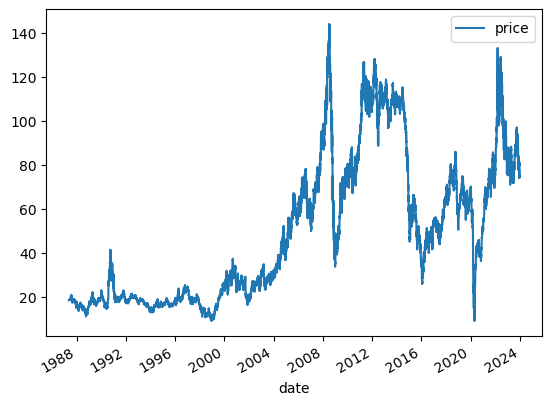

In [6]:
dfOil.plot()

<Axes: title={'center': 'Oil price variation'}, xlabel='Date', ylabel='Price'>

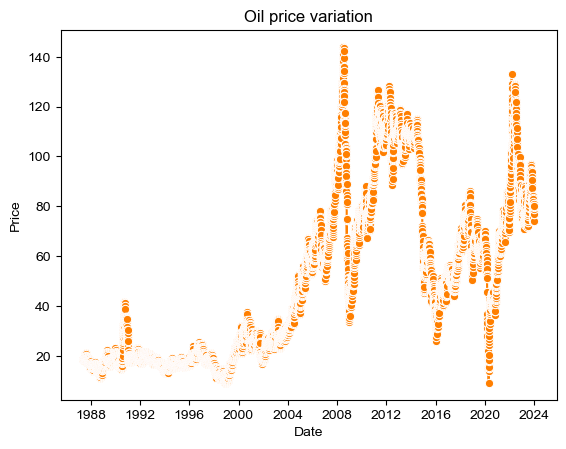

In [7]:
linha_cor = sns.color_palette("Paired")[7]
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Oil price variation')
sns.set(style="whitegrid") 
sns.lineplot(x='date', y='price', data=dfOil, marker='o', color = linha_cor)

# Train and Test Split

In [8]:
df_train = dfOil.loc[dfOil.index < '2020-01-01']
df_test = dfOil.loc[dfOil.index >= '2020-01-01']

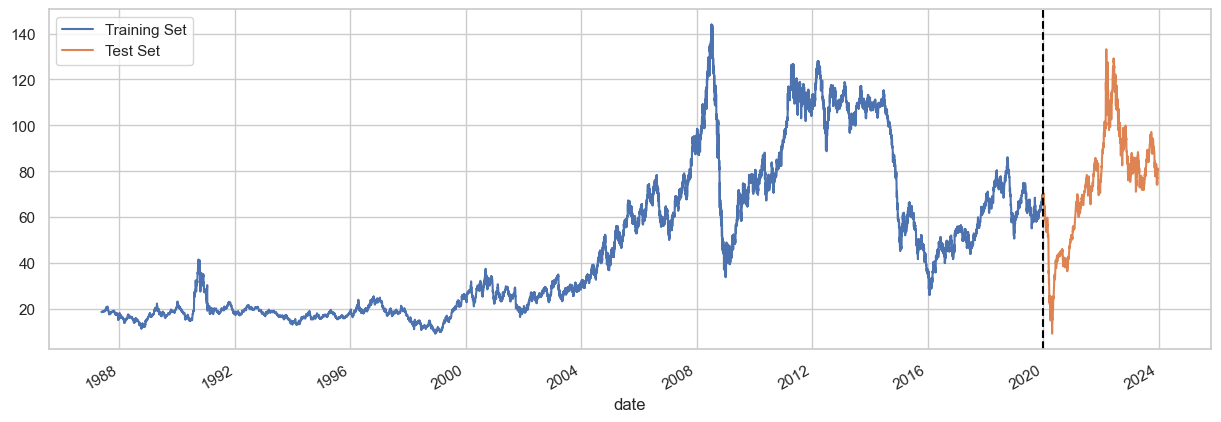

In [9]:
fig, ax = plt.subplots(figsize = (15,5))
df_train.plot(ax=ax, label = 'Training Set')
df_test.plot(ax=ax, label = 'Test Set')
ax.axvline(dt.strptime('2020-01-01','%Y-%m-%d'), color = 'black', ls = '--')
ax.legend(['Training Set','Test Set'])
plt.show()

# Feature Creation

In [10]:
def create_feature(df):
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

df = create_feature(dfOil)
df

,price,hour,dayofweek,quarter,month,year,dayofyear
date,,,,,,,
1987-05-20,18.63,0,2,2,5,1987,140
1987-05-21,18.45,0,3,2,5,1987,141
1987-05-22,18.55,0,4,2,5,1987,142
1987-05-25,18.60,0,0,2,5,1987,145
1987-05-26,18.63,0,1,2,5,1987,146
...,...,...,...,...,...,...,...
2023-12-19,79.82,0,1,4,12,2023,353
2023-12-20,81.10,0,2,4,12,2023,354
2023-12-21,80.73,0,3,4,12,2023,355


# Visualize our Feature/ Target Relationship

Text(0.5, 1.0, 'Price per month')

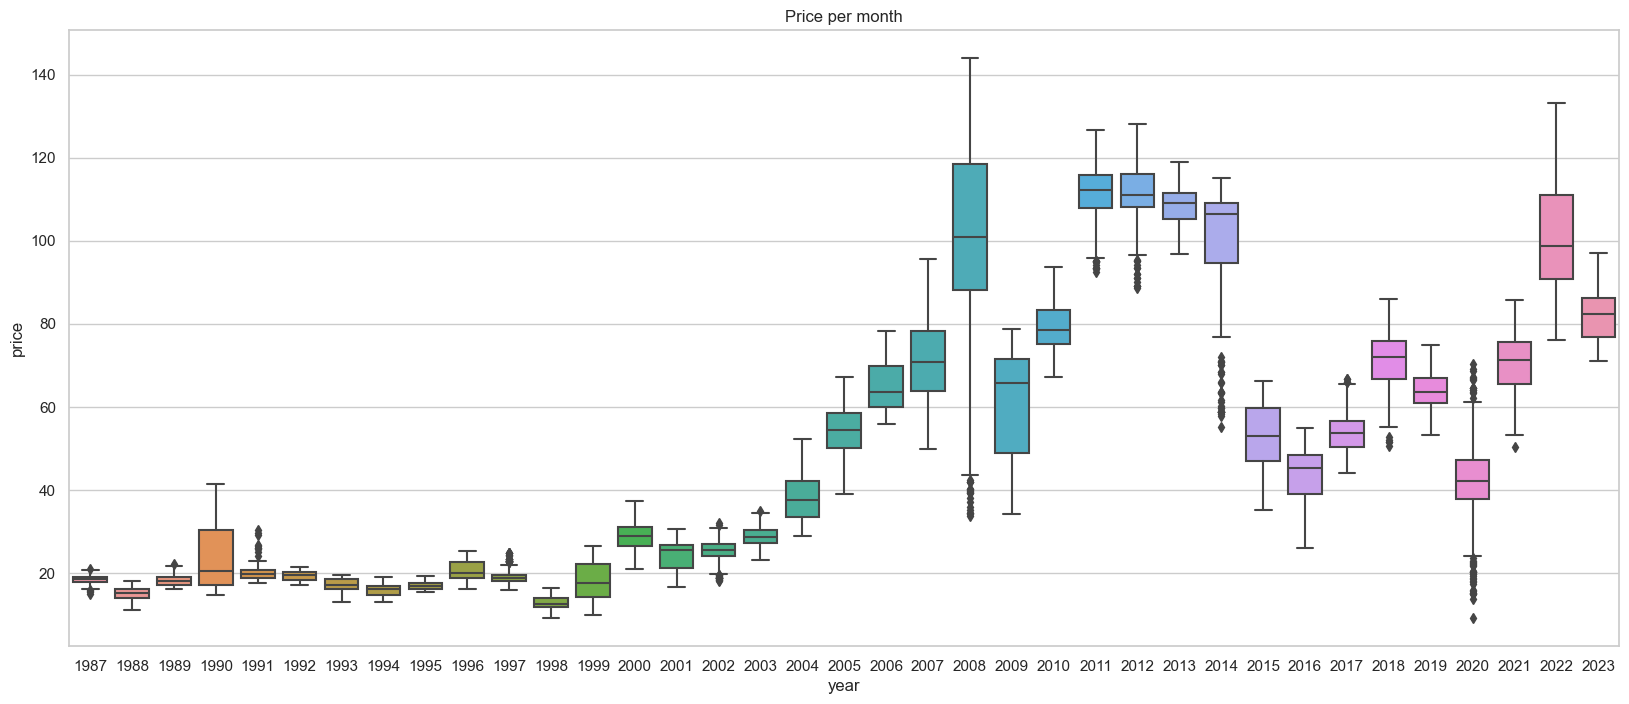

In [11]:
fig,ax = plt.subplots(figsize = (20,8))
sns.boxplot(data = df,x='year',y = 'price')
ax.set_title('Price per month')

# Creating Model

In [12]:
train = create_feature(df_train)
test =create_feature(df_test)

C:\Users\User\AppData\Local\Temp\ipykernel_11116\1663398527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\User\AppData\Local\Temp\ipykernel_11116\1663398527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
C:\Users\User\AppData\Local\Temp\ipykernel_11116\1663398527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [13]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = ['price']

In [14]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


In [15]:
reg = xgb.XGBRegressor(n_estimators = 1500, learning_rate =0.01)
reg.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)],
          early_stopping_rounds = 50,
          verbose = 100
          
          )

c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:32.98517	validation_1-rmse:33.27069
[100]	validation_0-rmse:13.27536	validation_1-rmse:28.18459
[200]	validation_0-rmse:6.67607	validation_1-rmse:26.82627
[300]	validation_0-rmse:4.32208	validation_1-rmse:26.37396
[400]	validation_0-rmse:3.11928	validation_1-rmse:26.24453
[500]	validation_0-rmse:2.47237	validation_1-rmse:26.20913
[600]	validation_0-rmse:2.12526	validation_1-rmse:26.19264
[618]	validation_0-rmse:2.08631	validation_1-rmse:26.19249


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Feature Importance

In [16]:
fi = pd.DataFrame(data = reg.feature_importances_, index=reg.feature_names_in_,
             
             columns = ['importance']
             )

<Axes: title={'center': 'Feature Importance'}>

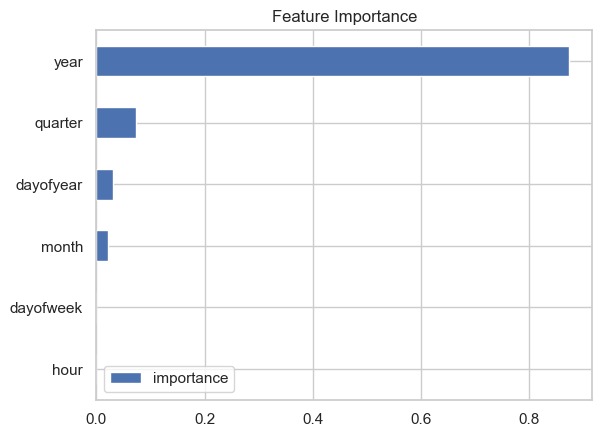

In [17]:
fi.sort_values('importance').plot(kind = 'barh', title='Feature Importance')

# Forecast on Test

In [18]:
test['prediction'] = reg.predict(X_test)

C:\Users\User\AppData\Local\Temp\ipykernel_11116\2903689382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


In [19]:
df =df.merge(test[['prediction']], how = 'left', left_index = True, right_index=True)

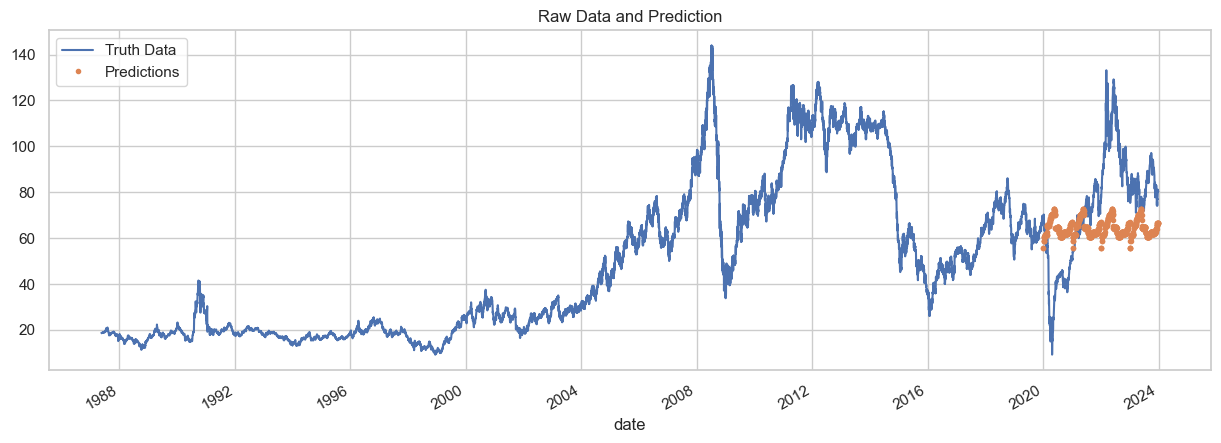

In [20]:
ax = df[['price']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax, style = '.')
plt.legend(['Truth Data','Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

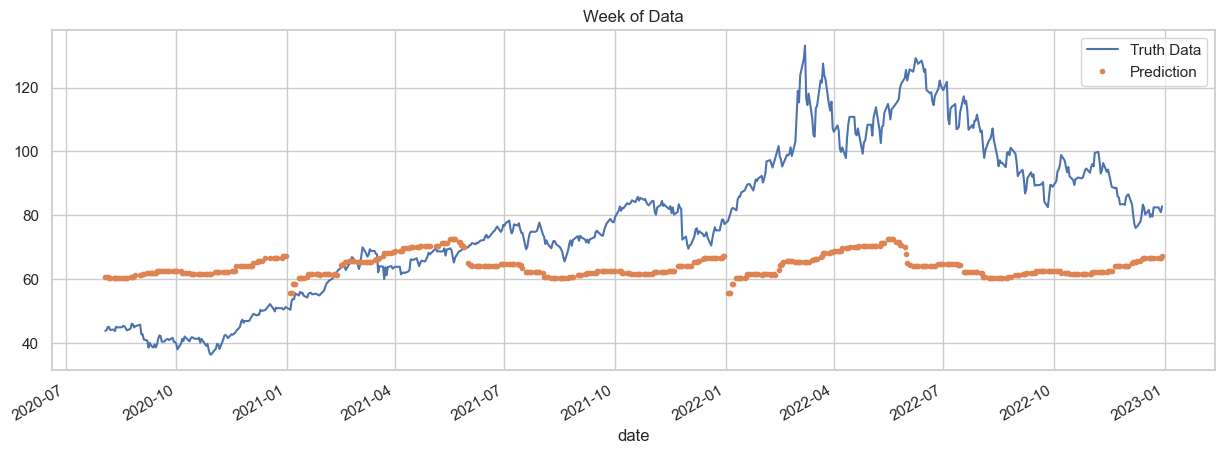

In [21]:
ax = df.loc[(df.index > '2020-08-01') & (df.index < '2023-01-01')]['price'].plot(figsize=(15,5), title = 'Week of Data')
df.loc[(df.index > '2020-08-01') & (df.index < '2023-01-01')]['prediction'].plot(style = '.')
plt.legend(['Truth Data','Prediction'])
plt.show()

# Calculate Error

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
error = mean_squared_error(test['price'], test['prediction'])
print('The error value is: {0}'.format(round(error,2)))

The error value is: 685.97
